In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import warnings
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
import timeit
from decimal import *
#import data_cleaner_encoder as dce
warnings.filterwarnings('ignore')
getcontext().prec = 2

In [2]:
def get_data():
    #Load the row data from the file 
    data = pd.read_csv('./Data/Africa_Vectors_database_1898-2016.csv', sep = ',', encoding = "ISO-8859-1")
    
    # remove white spaces at the begining and end of column names and labels in the columns
    Region = 'GAUL_Admin1'
    data.columns = data.columns.str.strip()
    data['Country']= data['Country'].str.strip()
    data[Region]= data[Region].str.strip()
    data['Adults/Larvae']= data['Adults/Larvae'].str.strip()

    # convert the 3 columns to Upper case
    data['Country'] = data['Country'].str.upper()
    data[Region] = data[Region].str.upper()
    data['Adults/Larvae'] = data['Adults/Larvae'].str.upper()

    #change the column name of Full_Name to Region
    data = data.rename(columns={Region: 'Region'})

    #Taking the mean over the two years, round is to make sure we do not have decimals in years 
    data['Year'] = list(round(data[['YeStart', 'YeEnd']].mean(axis=1)))

    #Selecting the features to keep
    features =['Country','Region', 'Lat', 'Long','Year', 'An gambiae_complex', 'An gambiae ss', 'SS M Form (An colluzzi or Mopti forms)', 'SS S Form (savanah or Bamako forms)','An arabiensis','An. melas','An. merus','An bwambae','An funestus  s.l','An funestus s.s. (specified)','An rivulorum','An leesoni','An parensis','An vaneedeni','An nili s.l','An moucheti s.l','An pharoensis','An hancocki','An mascarensis','An marshalli','An squamous','An wellcomei','An rufipes','An coustani s.l','An ziemanni','An paludis','Adults/Larvae']

    #Returning a dataset with only the features kept
    featured_data= data[features]

    #remove records with Lat,Long missing values 
    featured_data = featured_data.dropna(axis=0, subset=['Lat'])

    #encoding the species classes 
    encoded_data = featured_data.replace(np.nan,0).replace('Y',1)

    # Reseting the  index
    encoded_data=encoded_data.reset_index(drop=True)

    #encoding the labels columns 
    # Label encoding for Country, Region, and  Adults/Larvae columns 
    le = preprocessing.LabelEncoder()
    encoded_data['Country'] = le.fit_transform(encoded_data['Country'])
    encoded_data['Adults/Larvae'] = le.fit_transform(encoded_data['Adults/Larvae'])
    encoded_data['Region'] = le.fit_transform(encoded_data['Region'].astype(str))
    
    #normalize the data
    #encoded_data=(encoded_data-encoded_data.mean())/encoded_data.std()

    
    #normalize the longitude and latitude 
#     encoded_data['Lat']=(encoded_data['Lat']-encoded_data['Lat'].mean())/encoded_data['Lat'].std()
#     encoded_data['Long']=(encoded_data['Long']-encoded_data['Long'].mean())/encoded_data['Long'].std()
#     encoded_data['Year']=(encoded_data['Year']-encoded_data['Year'].mean())/encoded_data['Year'].std()
      
    #feature scaling for year, longitude and latitude 
    encoded_data['Lat']=(encoded_data['Lat']-encoded_data['Lat'].min())/encoded_data['Lat'].max()
    encoded_data['Long']=(encoded_data['Long']-encoded_data['Long'].min())/encoded_data['Long'].max()
    encoded_data['Year']=(encoded_data['Year']-encoded_data['Year'].min())/encoded_data['Year'].max()
    encoded_data['Region']=(encoded_data['Region']-encoded_data['Region'].min())/encoded_data['Region'].max()

    #convert the year column from float to int 
    #data = data.astype({'Year':'int'})


    return encoded_data

In [3]:
encoded_data = get_data()
train_data = encoded_data.iloc[:,:5]#np.vstack([encoded_data.Long, encoded_data.Lat, encoded_data.year])

In [4]:
train_data = pd.DataFrame(train_data)
#train_data = train_data.T
train_data

,Country,Region,Lat,Long,Year
0,0,0.104478,1.168497,0.751352,0.033234
1,0,0.104478,1.162796,0.755336,0.043155
2,0,0.104478,1.164257,0.754047,0.050595
3,0,0.104478,1.171800,0.753051,0.034722
4,0,0.104478,1.166569,0.773947,0.019841
5,0,0.104478,1.137143,0.755336,0.026786
6,0,0.104478,1.133342,0.758604,0.019841
7,0,0.104478,1.147965,0.755762,0.050595
8,0,0.104478,1.151426,0.755691,0.032242
9,0,0.104478,1.140038,0.756430,0.034722


In [5]:
# encoded_data.columns
species_columns = (encoded_data.columns[5:-1])

In [6]:
species_columns
species_data = encoded_data[species_columns]
species_columns

Index(['An gambiae_complex', 'An gambiae ss',
       'SS M Form (An colluzzi or Mopti forms)',
       'SS S Form (savanah or Bamako forms)', 'An arabiensis', 'An. melas',
       'An. merus', 'An bwambae', 'An funestus  s.l',
       'An funestus s.s. (specified)', 'An rivulorum', 'An leesoni',
       'An parensis', 'An vaneedeni', 'An nili s.l', 'An moucheti s.l',
       'An pharoensis', 'An hancocki', 'An mascarensis', 'An marshalli',
       'An squamous', 'An wellcomei', 'An rufipes', 'An coustani s.l',
       'An ziemanni', 'An paludis'],
      dtype='object')

## Training & Cross-validation - Logistic Regression

In [7]:
# Train on individual species
def train_on_species(algname,algorithm, X_train,species_columns):
    start = timeit.default_timer()
    print('Training with ', algname)
    scoring = ['accuracy']
    prediction_accuracy = np.array([])
    for i in range(len(species_columns)):
        y = species_data.iloc[:,i]        
        scores = cross_validate(algorithm, X_train, y, scoring=scoring, cv=20)
        sorted(scores.keys())
        alg_accuracy = scores['test_accuracy'].mean() * 100
        prediction_accuracy = np.append(prediction_accuracy, alg_accuracy)  
    stop = timeit.default_timer()
    time = (stop-start)
    Decimal(time)
    print('Training time: ',time,'s')
    return prediction_accuracy, time

In [8]:
logreg, logreg_time = train_on_species('Logistic Regression',LogisticRegression(),train_data, species_columns)
print(logreg)


Training with  Logistic Regression
Training time:  17.740643772998737 s
[86.21908842 72.39165115 88.90561253 86.52044543 74.05375883 95.96402073
 98.10209638 99.80502965 57.52705247 94.54620289 98.16960714 98.59722065
 99.69243972 99.74501474 93.83348583 96.25657811 85.82900797 97.77199096
 92.11236471 96.68420139 90.2926378  97.95955538 92.51315452 79.4377868
 95.03378712 97.18687649]


In [9]:
DecisionTC, DecisionTC_time = train_on_species('Decision Tree Classifier',DecisionTreeClassifier(),train_data, species_columns)
print(DecisionTC)

Training with  Decision Tree Classifier
Training time:  18.60035779499958 s
[66.06806991 55.91335758 66.7887432  67.72607546 54.99695641 84.85110852
 91.87008765 99.36944806 38.08974624 72.28014482 72.75271704 76.44528025
 91.74564735 93.1778472  54.20160789 76.76779009 49.62665549 83.00195464
 90.5353613  73.10497672 52.77401823 74.20748455 56.64673743 40.14326679
 54.38813099 70.59608166]


In [10]:
randomFC, randomFC_time = train_on_species('Random Forest Classifier', RandomForestClassifier(),train_data, species_columns)
print(randomFC)

Training with  Random Forest Classifier
Training time:  57.299959772000875 s
[68.99086261 55.229613   72.42501284 70.56898131 55.6508663  87.05480366
 92.41034795 99.81989851 36.47566359 76.5740171  82.88805336 81.31310852
 93.37439378 98.70089395 59.92117127 84.2338945  52.8376965  85.2239309
 90.90331894 76.99788461 61.25225261 80.95294241 68.69274429 42.69071043
 64.08535338 83.80101678]


In [11]:
QDA, QDA_time = train_on_species('Quadratic Discriminant Analysis',QuadraticDiscriminantAnalysis(),train_data, species_columns)
print(QDA)

Training with  Quadratic Discriminant Analysis
Training time:  4.551990560999911 s
[83.86319341 78.48341551 85.28486812 85.18559639 70.81561475 91.77083735
 95.96050393  0.19497035 55.90006947 93.29453955 97.94438191 98.57469813
 99.66991719 99.09059758 93.64579814 96.25657811 85.22840737 97.77199096
 93.87412113 96.68420139 87.39908458 97.95955538 92.3930344  78.73168816
 95.03378712 97.18687649]


In [12]:
LDA, LDA_time = train_on_species('Linear Discriminant Analysis',LinearDiscriminantAnalysis(),train_data, species_columns)
print(LDA)

Training with  Linear Discriminant Analysis
Training time:  6.662457069998709 s
[85.6492834  76.86246818 89.54295151 88.28956087 72.5342404  95.89645317
 98.03446108 99.80502965 57.63939474 94.54620289 98.16960714 98.59722065
 99.69243972 99.73749595 93.83348583 96.25657811 85.82900797 97.77199096
 94.4397033  96.68420139 90.07508868 97.95955538 92.43807944 78.20689328
 95.03378712 97.18687649]


In [13]:
kmeans, kmeans_time = train_on_species('KMeans',KMeans(),train_data, species_columns)
print(kmeans)

Training with  KMeans
Training time:  46.733446181000545 s
[ 7.77165471 11.81520726 12.62413838 19.91670831 10.25630203  9.68488729
  7.74576676 25.59954257  6.21765694  5.63532423 10.17725372  8.57185146
  5.          5.46546547 26.38076232 14.93455975 13.78435782  4.00701676
 21.84912048 11.08109234  2.52234243  3.9639302   8.17595707  9.6181864
 10.76328953 16.69413041]


In [14]:
KNN, KNN_time = train_on_species('K-Nearest Neighbor', KNeighborsClassifier(),train_data, species_columns)
print(KNN)

Training with  K-Nearest Neighbor
Training time:  34.28453443200124 s
[45.69336623 28.28001115 54.42100805 50.01041715 33.08595326 73.56976494
 85.67556143 99.43698189 30.76052509 54.03098863 65.861704   67.98988918
 88.79563586 95.69221408 47.3223669  73.58171502 41.27538007 69.22413553
 88.92982354 51.25411238 32.34205137 56.8295728  48.77936833 27.72339511
 40.74352322 65.19621017]


In [15]:
Gaussiannb, Gaussiannb_time  = train_on_species('Gaussian Naive Bayes',GaussianNB(),train_data, species_columns)
print(Gaussiannb)

Training with  Gaussian Naive Bayes
Training time:  3.7271553840000706 s
[84.89164366 77.10475715 85.2326292  86.81488391 71.18997644 93.78086681
 97.47811634 99.87237237 59.48431735 94.38901726 98.16960714 98.59722065
 99.69243972 99.6019547  93.83348583 96.25657811 85.82900797 97.77199096
 93.8515986  96.68420139 86.04056058 97.95955538 92.51315452 78.02626328
 95.03378712 97.18687649]


In [16]:
extra_tree, extra_tree_time = train_on_species('Extra Tree Classifier', ExtraTreesClassifier(),train_data, species_columns)
print(extra_tree)

Training with  Extra Tree Classifier
Training time:  29.841045114000735 s
[66.04913287 45.68553167 68.43511596 67.81635787 49.79241582 83.94906978
 90.18903489 99.79739846 36.0398672  70.2614994  78.78760709 77.68996379
 93.92393883 95.43492919 58.84057223 82.00007945 56.69675338 85.66104706
 90.76094633 75.82132172 55.1793562  80.76885082 61.99647419 41.28434694
 54.45057691 81.8505935 ]


In [17]:
time_accuracy_tab = pd.DataFrame([logreg,DecisionTC,randomFC,QDA, LDA, kmeans, KNN, Gaussiannb, extra_tree], columns = species_columns)
time_accuracy_tab['Model'] = ['Logistic Regression','Decision Tree','Random Forest','Quadratic Discriminant','Linear Discriminant','KMeans','KNearest Neighbor','Gaussian Naive Bayes','Extra Tree']
time_accuracy_tab['Train Time'] = ([logreg_time,DecisionTC_time, randomFC_time, QDA_time, LDA_time,kmeans_time, KNN_time,Gaussiannb_time,extra_tree_time])
time_accuracy_tab = time_accuracy_tab.iloc[:,-2:].join(time_accuracy_tab.iloc[:,:-2])
time_accuracy_tab['Mean Accuracy'] = time_accuracy_tab.iloc[:,2:].mean()
for i in range(len(time_accuracy_tab)):
    time_accuracy_tab.iloc[i,-1:] = (time_accuracy_tab.iloc[i,2:-1]).mean()
time_accuracy_tab

,Model,Train Time,An gambiae_complex,An gambiae ss,SS M Form (An colluzzi or Mopti forms),SS S Form (savanah or Bamako forms),An arabiensis,An. melas,An. merus,An bwambae,...,An hancocki,An mascarensis,An marshalli,An squamous,An wellcomei,An rufipes,An coustani s.l,An ziemanni,An paludis,Mean Accuracy
0,Logistic Regression,17.740644,86.219088,72.391651,88.905613,86.520445,74.053759,95.964021,98.102096,99.805030,...,97.771991,92.112365,96.684201,90.292638,97.959555,92.513155,79.437787,95.033787,97.186876,90.967333
1,Decision Tree,18.600358,66.068070,55.913358,66.788743,67.726075,54.996956,84.851109,91.870088,99.369448,...,83.001955,90.535361,73.104977,52.774018,74.207485,56.646737,40.143267,54.388131,70.596082,69.541127
2,Random Forest,57.299960,68.990863,55.229613,72.425013,70.568981,55.650866,87.054804,92.410348,99.819899,...,85.223931,90.903319,76.997885,61.252253,80.952942,68.692744,42.690710,64.085353,83.801017,73.964209
3,Quadratic Discriminant,4.551991,83.863193,78.483416,85.284868,85.185596,70.815615,91.770837,95.960504,0.194970,...,97.771991,93.874121,96.684201,87.399085,97.959555,92.393034,78.731688,95.033787,97.186876,86.469166
4,Linear Discriminant,6.662457,85.649283,76.862468,89.542952,88.289561,72.534240,95.896453,98.034461,99.805030,...,97.771991,94.439703,96.684201,90.075089,97.959555,92.438079,78.206893,95.033787,97.186876,91.181233
5,KMeans,46.733446,7.771655,11.815207,12.624138,19.916708,10.256302,9.684887,7.745767,25.599543,...,4.007017,21.849120,11.081092,2.522342,3.963930,8.175957,9.618186,10.763290,16.694130,11.163712
6,KNearest Neighbor,34.284534,45.693366,28.280011,54.421008,50.010417,33.085953,73.569765,85.675561,99.436982,...,69.224136,88.929824,51.254112,32.342051,56.829573,48.779368,27.723395,40.743523,65.196210,58.327141
7,Gaussian Naive Bayes,3.727155,84.891644,77.104757,85.232629,86.814884,71.189976,93.780867,97.478116,99.872372,...,97.771991,93.851599,96.684201,86.040561,97.959555,92.513155,78.026263,95.033787,97.186876,90.664879
8,Extra Tree,29.841045,66.049133,45.685532,68.435116,67.816358,49.792416,83.949070,90.189035,99.797398,...,85.661047,90.760946,75.821322,55.179356,80.768851,61.996474,41.284347,54.450577,81.850594,71.121645


In [18]:
time_accuracy_tab.sort_values(by = 'Mean Accuracy', ascending = False)

,Model,Train Time,An gambiae_complex,An gambiae ss,SS M Form (An colluzzi or Mopti forms),SS S Form (savanah or Bamako forms),An arabiensis,An. melas,An. merus,An bwambae,...,An hancocki,An mascarensis,An marshalli,An squamous,An wellcomei,An rufipes,An coustani s.l,An ziemanni,An paludis,Mean Accuracy
4,Linear Discriminant,6.662457,85.649283,76.862468,89.542952,88.289561,72.534240,95.896453,98.034461,99.805030,...,97.771991,94.439703,96.684201,90.075089,97.959555,92.438079,78.206893,95.033787,97.186876,91.181233
0,Logistic Regression,17.740644,86.219088,72.391651,88.905613,86.520445,74.053759,95.964021,98.102096,99.805030,...,97.771991,92.112365,96.684201,90.292638,97.959555,92.513155,79.437787,95.033787,97.186876,90.967333
7,Gaussian Naive Bayes,3.727155,84.891644,77.104757,85.232629,86.814884,71.189976,93.780867,97.478116,99.872372,...,97.771991,93.851599,96.684201,86.040561,97.959555,92.513155,78.026263,95.033787,97.186876,90.664879
3,Quadratic Discriminant,4.551991,83.863193,78.483416,85.284868,85.185596,70.815615,91.770837,95.960504,0.194970,...,97.771991,93.874121,96.684201,87.399085,97.959555,92.393034,78.731688,95.033787,97.186876,86.469166
2,Random Forest,57.299960,68.990863,55.229613,72.425013,70.568981,55.650866,87.054804,92.410348,99.819899,...,85.223931,90.903319,76.997885,61.252253,80.952942,68.692744,42.690710,64.085353,83.801017,73.964209
8,Extra Tree,29.841045,66.049133,45.685532,68.435116,67.816358,49.792416,83.949070,90.189035,99.797398,...,85.661047,90.760946,75.821322,55.179356,80.768851,61.996474,41.284347,54.450577,81.850594,71.121645
1,Decision Tree,18.600358,66.068070,55.913358,66.788743,67.726075,54.996956,84.851109,91.870088,99.369448,...,83.001955,90.535361,73.104977,52.774018,74.207485,56.646737,40.143267,54.388131,70.596082,69.541127
6,KNearest Neighbor,34.284534,45.693366,28.280011,54.421008,50.010417,33.085953,73.569765,85.675561,99.436982,...,69.224136,88.929824,51.254112,32.342051,56.829573,48.779368,27.723395,40.743523,65.196210,58.327141
5,KMeans,46.733446,7.771655,11.815207,12.624138,19.916708,10.256302,9.684887,7.745767,25.599543,...,4.007017,21.849120,11.081092,2.522342,3.963930,8.175957,9.618186,10.763290,16.694130,11.163712


In [19]:
time_accuracy_tab.sort_values(by = 'Train Time')

,Model,Train Time,An gambiae_complex,An gambiae ss,SS M Form (An colluzzi or Mopti forms),SS S Form (savanah or Bamako forms),An arabiensis,An. melas,An. merus,An bwambae,...,An hancocki,An mascarensis,An marshalli,An squamous,An wellcomei,An rufipes,An coustani s.l,An ziemanni,An paludis,Mean Accuracy
7,Gaussian Naive Bayes,3.727155,84.891644,77.104757,85.232629,86.814884,71.189976,93.780867,97.478116,99.872372,...,97.771991,93.851599,96.684201,86.040561,97.959555,92.513155,78.026263,95.033787,97.186876,90.664879
3,Quadratic Discriminant,4.551991,83.863193,78.483416,85.284868,85.185596,70.815615,91.770837,95.960504,0.194970,...,97.771991,93.874121,96.684201,87.399085,97.959555,92.393034,78.731688,95.033787,97.186876,86.469166
4,Linear Discriminant,6.662457,85.649283,76.862468,89.542952,88.289561,72.534240,95.896453,98.034461,99.805030,...,97.771991,94.439703,96.684201,90.075089,97.959555,92.438079,78.206893,95.033787,97.186876,91.181233
0,Logistic Regression,17.740644,86.219088,72.391651,88.905613,86.520445,74.053759,95.964021,98.102096,99.805030,...,97.771991,92.112365,96.684201,90.292638,97.959555,92.513155,79.437787,95.033787,97.186876,90.967333
1,Decision Tree,18.600358,66.068070,55.913358,66.788743,67.726075,54.996956,84.851109,91.870088,99.369448,...,83.001955,90.535361,73.104977,52.774018,74.207485,56.646737,40.143267,54.388131,70.596082,69.541127
8,Extra Tree,29.841045,66.049133,45.685532,68.435116,67.816358,49.792416,83.949070,90.189035,99.797398,...,85.661047,90.760946,75.821322,55.179356,80.768851,61.996474,41.284347,54.450577,81.850594,71.121645
6,KNearest Neighbor,34.284534,45.693366,28.280011,54.421008,50.010417,33.085953,73.569765,85.675561,99.436982,...,69.224136,88.929824,51.254112,32.342051,56.829573,48.779368,27.723395,40.743523,65.196210,58.327141
5,KMeans,46.733446,7.771655,11.815207,12.624138,19.916708,10.256302,9.684887,7.745767,25.599543,...,4.007017,21.849120,11.081092,2.522342,3.963930,8.175957,9.618186,10.763290,16.694130,11.163712
2,Random Forest,57.299960,68.990863,55.229613,72.425013,70.568981,55.650866,87.054804,92.410348,99.819899,...,85.223931,90.903319,76.997885,61.252253,80.952942,68.692744,42.690710,64.085353,83.801017,73.964209


[]

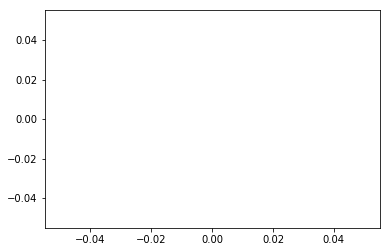